# Sales Analysis

#### Import necessary libraries

In [43]:
import os
import pandas as pd

#### Merge the 12 months of sales data into a single CSV file

In [44]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
    

#### Read in updated dataframe

In [45]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,284242,34in Ultrawide Monitor,1,379.99,12/30/19 12:01,"489 Hill St, New York City, NY 10001"
1,284243,Wired Headphones,2,11.99,12/06/19 22:50,"788 11th St, San Francisco, CA 94016"
2,284244,27in FHD Monitor,1,149.99,12/04/19 14:55,"435 Jefferson St, San Francisco, CA 94016"
3,284245,Apple Airpods Headphones,1,150.0,12/06/19 20:08,"617 6th St, New York City, NY 10001"
4,284246,Bose SoundSport Headphones,1,99.99,12/11/19 13:29,"773 River St, Portland, OR 97035"


### Clean up the data!
To find things I need to clean I performed operations to get errors. Based on the errors, I decide how I should go about cleaning the data

##### Drop rows of NAN

In [46]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
487,NaN,NaN,NaN,NaN,NaN,NaN
598,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN
3735,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,284242,34in Ultrawide Monitor,1,379.99,12/30/19 12:01,"489 Hill St, New York City, NY 10001"
1,284243,Wired Headphones,2,11.99,12/06/19 22:50,"788 11th St, San Francisco, CA 94016"
2,284244,27in FHD Monitor,1,149.99,12/04/19 14:55,"435 Jefferson St, San Francisco, CA 94016"
3,284245,Apple Airpods Headphones,1,150.0,12/06/19 20:08,"617 6th St, New York City, NY 10001"
4,284246,Bose SoundSport Headphones,1,99.99,12/11/19 13:29,"773 River St, Portland, OR 97035"


##### Get rid of text in order date column

In [47]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [48]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

### Augment data with additional columns

#### Task 1: Add month column
Extracting from Order Date (04/19/19) column into Month (04) column

In [49]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

# Alternative method to add Month column from a Data string
# all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,284242,34in Ultrawide Monitor,1,379.99,12/30/19 12:01,"489 Hill St, New York City, NY 10001",12
1,284243,Wired Headphones,2,11.99,12/06/19 22:50,"788 11th St, San Francisco, CA 94016",12
2,284244,27in FHD Monitor,1,149.99,12/04/19 14:55,"435 Jefferson St, San Francisco, CA 94016",12
3,284245,Apple Airpods Headphones,1,150.00,12/06/19 20:08,"617 6th St, New York City, NY 10001",12
4,284246,Bose SoundSport Headphones,1,99.99,12/11/19 13:29,"773 River St, Portland, OR 97035",12


#### Task 2: Add city column
- Required for Question 2 (What city had the highest number of sales?
- Extract the City columnd from Purchase Address

In [63]:
# From Purchase Address = "489 Hill St, New York City, NY 10001"
# To City = "New York City (NY)"

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,284242,34in Ultrawide Monitor,1,379.99,12/30/19 12:01,"489 Hill St, New York City, NY 10001",12,New York City (NY),379.99,12,1,1
1,284243,Wired Headphones,2,11.99,12/06/19 22:50,"788 11th St, San Francisco, CA 94016",12,San Francisco (CA),23.98,22,50,1
2,284244,27in FHD Monitor,1,149.99,12/04/19 14:55,"435 Jefferson St, San Francisco, CA 94016",12,San Francisco (CA),149.99,14,55,1
3,284245,Apple Airpods Headphones,1,150.00,12/06/19 20:08,"617 6th St, New York City, NY 10001",12,New York City (NY),150.00,20,8,1
4,284246,Bose SoundSport Headphones,1,99.99,12/11/19 13:29,"773 River St, Portland, OR 97035",12,Portland (OR),99.99,13,29,1


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 
- Why certain months are better than others?
- Ex: the fourth month (april), did we spend more money on advertising
- Determine the correlations. Ex: Why would we do so much better in December => Christmas?

In [51]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [52]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,13439,2169022.06,2181299.13
2,18544,3017895.70,3034864.69
3,11751,1960469.85,1972033.51
4,8277,1399122.93,1406845.54
5,20420,3368903.57,3388503.43
6,16845,2823025.99,2842116.72
7,18494,3083271.57,3098027.22
8,5892,970568.40,977817.41
9,12579,2118340.97,2136871.60


range(1, 13)


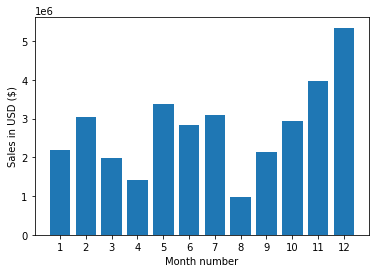

In [53]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city had the highest number of sales?

In [54]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16127,2679354.15,102280,2696207.54
Austin (TX),10531,1765932.92,67130,1778379.66
Boston (MA),21470,3515095.95,137273,3540848.03
Dallas (TX),15989,2663072.51,102641,2677047.52
Los Angeles (CA),32256,5306462.02,205184,5338728.98
New York City (NY),26645,4369893.25,169954,4397205.89
Portland (ME),2632,442603.70,17191,444670.14
Portland (OR),10651,1739179.17,68054,1749628.09
San Francisco (CA),48079,7967001.82,306038,8015068.71


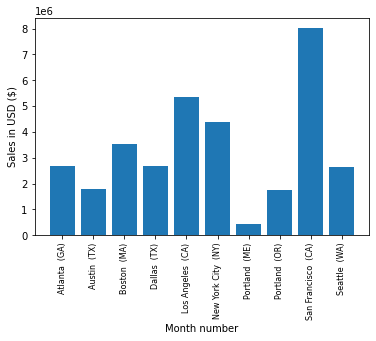

In [55]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [56]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,284242,34in Ultrawide Monitor,1,379.99,12/30/19 12:01,"489 Hill St, New York City, NY 10001",12,New York City (NY),379.99,12,1,1
1,284243,Wired Headphones,2,11.99,12/06/19 22:50,"788 11th St, San Francisco, CA 94016",12,San Francisco (CA),23.98,22,50,1
2,284244,27in FHD Monitor,1,149.99,12/04/19 14:55,"435 Jefferson St, San Francisco, CA 94016",12,San Francisco (CA),149.99,14,55,1
3,284245,Apple Airpods Headphones,1,150.00,12/06/19 20:08,"617 6th St, New York City, NY 10001",12,New York City (NY),150.00,20,8,1
4,284246,Bose SoundSport Headphones,1,99.99,12/11/19 13:29,"773 River St, Portland, OR 97035",12,Portland (OR),99.99,13,29,1


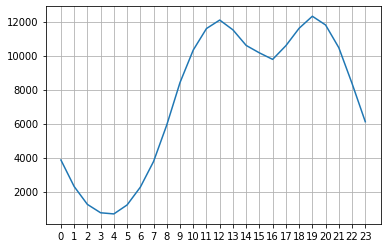

In [57]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [58]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/5p/g86ptb251wz01xb5n3ngh_gh0000gn/T/ipykernel_82800/3772502071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [59]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 950
('Google Phone', 'USB-C Charging Cable') 922
('iPhone', 'Wired Headphones') 514
('iPhone', 'Apple Airpods Headphones') 372
('Google Phone', 'Wired Headphones') 352
('Vareebadd Phone', 'USB-C Charging Cable') 323
('Google Phone', 'Bose SoundSport Headphones') 208
('Vareebadd Phone', 'Wired Headphones') 158
('USB-C Charging Cable', 'Wired Headphones') 128
('Lightning Charging Cable', 'Wired Headphones') 106


#### What product sold the most? Why do you think it sold the most?

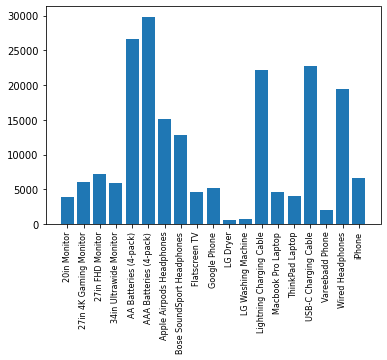

In [60]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

/var/folders/5p/g86ptb251wz01xb5n3ngh_gh0000gn/T/ipykernel_82800/136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/var/folders/5p/g86ptb251wz01xb5n3ngh_gh0000gn/T/ipykernel_82800/136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


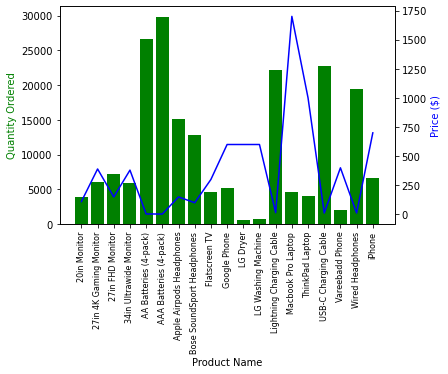

In [61]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()